In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
from astropy.io import fits
import pyflct

In [2]:
from matplotlib import font_manager
import matplotlib as mpl
font_path = '/home/flow/.fonts/cmunrm.ttf'  # Your font path goes here
#font_path = '/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
mpl.rcParams["font.size"] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rc('axes', unicode_minus=False)

<h3>Velocities that FLCT retrevies from LW intensity at 500nm</h3>

In [3]:
Vx_600 = fits.open("pyFLCT_fwhm_600_dt_30_500nmInte_tracked.fits")[0].data
Vy_600 = fits.open("pyFLCT_fwhm_600_dt_30_500nmInte_tracked.fits")[1].data

In [4]:
Vx_300 = fits.open("pyFLCT_fwhm_300_dt_30_500nmInte_tracked.fits")[0].data
Vy_300 = fits.open("pyFLCT_fwhm_300_dt_30_500nmInte_tracked.fits")[1].data

<h3>Simulation velocities</h3>

In [5]:
# After that, we shall load velocities taken directly from simulation
Vx = fits.open("Velocities_TAU_1_0.fits")[1].data # Vy from Velocities.fits as originally thought
Vy = fits.open("Velocities_TAU_1_0.fits")[0].data # Vx from Velocities.fits as originally thought
Vx = Vx[::3]
Vy = Vy[::3]
Vx = Vx.transpose(0, 2, 1)
Vy = Vy.transpose(0, 2, 1)

In [6]:
def temporal_avg(data_in, start, end):
    tmp_avg = np.mean(data_in[start:end], axis = 0)
    return tmp_avg

In [7]:
np.shape(Vx_600)

(29, 1536, 1536)

In [8]:
Vx_mean_sim29 = temporal_avg(Vx, 0, 29)
Vx_mean_sim29 = Vx_mean_sim29/1E5

Vy_mean_sim29 = temporal_avg(Vy, 0, 29)
Vy_mean_sim29 = Vy_mean_sim29/1E5

In [9]:
from scipy.stats import pearsonr

In [10]:
from scipy.ndimage import gaussian_filter

In [11]:
Vx_filtered22 = gaussian_filter(Vx_mean_sim29, 22.5, mode = "wrap")
Vy_filtered22 = gaussian_filter(Vy_mean_sim29, 22.5, mode = "wrap")

In [12]:
Vx_filtered11 = gaussian_filter(Vx_mean_sim29, 11.25, mode = "wrap")
Vy_filtered11 = gaussian_filter(Vy_mean_sim29, 11.25, mode = "wrap")

In [13]:
Vx_FLCT_600 = temporal_avg(Vx_600, 0, 29)
Vy_FLCT_600 = temporal_avg(Vy_600, 0, 29)

In [14]:
Vx_FLCT_300 = temporal_avg(Vx_300, 0, 29)
Vy_FLCT_300 = temporal_avg(Vy_300, 0, 29)

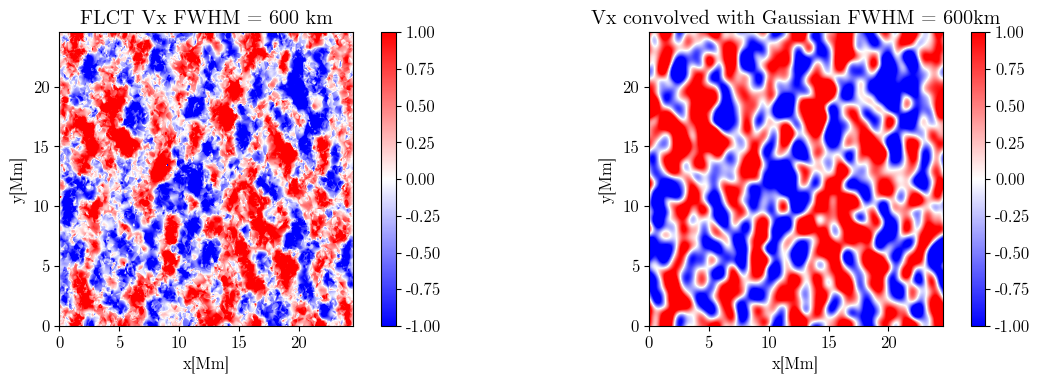

In [15]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i filtirano Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_FLCT_600[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
ax1.set_title("FLCT Vx FWHM = 600 km") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_filtered22[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -1, vmax =1)
ax2.set_title("Vx convolved with Gaussian FWHM = 600km") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("FLCT_500nm_600km", bbox_inches = 'tight', dpi = 75)

In [16]:
r_x1_600 = pearsonr(Vx_600[0].flatten(), Vx[0].flatten())
print(r_x1_600)

PearsonRResult(statistic=0.08347184175867568, pvalue=0.0)


In [17]:
r_x2_600 = pearsonr(Vx_FLCT_600.flatten(), Vx_mean_sim29.flatten())
print(r_x2_600)

PearsonRResult(statistic=0.24138222633035605, pvalue=0.0)


In [18]:
r_x3_600 = pearsonr(Vx_FLCT_600.flatten(), Vx_filtered22.flatten())
print(r_x3_600)

PearsonRResult(statistic=0.27480817137089897, pvalue=0.0)


In [19]:
r_y1_600 = pearsonr(Vy_600[0].flatten(), Vy[0].flatten())
print(r_y1_600)

PearsonRResult(statistic=0.037499076450409494, pvalue=0.0)


In [20]:
r_y2_600 = pearsonr(Vy_FLCT_600.flatten(), Vy_mean_sim29.flatten())
print(r_y2_600)

PearsonRResult(statistic=0.44894713752234383, pvalue=0.0)


In [21]:
r_y3_600 = pearsonr(Vy_FLCT_600.flatten(), Vy_filtered22.flatten())
print(r_y3_600)

PearsonRResult(statistic=0.5142211171690831, pvalue=0.0)


In [22]:
print(Vx_FLCT_600)

[[ 0.08850652  0.08924866  0.08952015 ...  0.00359312 -0.00060503
  -0.01081742]
 [ 0.20283633  0.20378672  0.2043199  ...  0.01621731  0.01057132
   0.00187953]
 [ 0.20335071  0.20430753  0.20485944 ...  0.02523525  0.02070785
   0.0103393 ]
 ...
 [-0.1389758   0.19321715  0.1958745  ... -0.04374033 -0.05733428
   0.22467392]
 [-0.14196813  0.19295466  0.1953967  ... -0.08594206 -0.09697565
   0.18744064]
 [-0.14493506  0.19200326  0.19435593 ... -0.08227583 -0.09432643
   0.18968419]]


In [23]:
print(Vx_filtered22)

[[1.011087   0.97255456 0.9332917  ... 1.1207544  1.085336   1.0487314 ]
 [1.0264456  0.9879262  0.9486578  ... 1.1359724  1.100617   1.0640596 ]
 [1.0414723  1.0029638  0.9636881  ... 1.1508641  1.1155698  1.0790578 ]
 ...
 [0.9633154  0.9247306  0.8854696  ... 1.0734433  1.0378234  1.0010645 ]
 [0.9794907  0.9409259  0.90166694 ... 1.0894585  1.0539079  1.0172026 ]
 [0.99542516 0.95687777 0.9176181  ... 1.1052395  1.069756   1.0331023 ]]


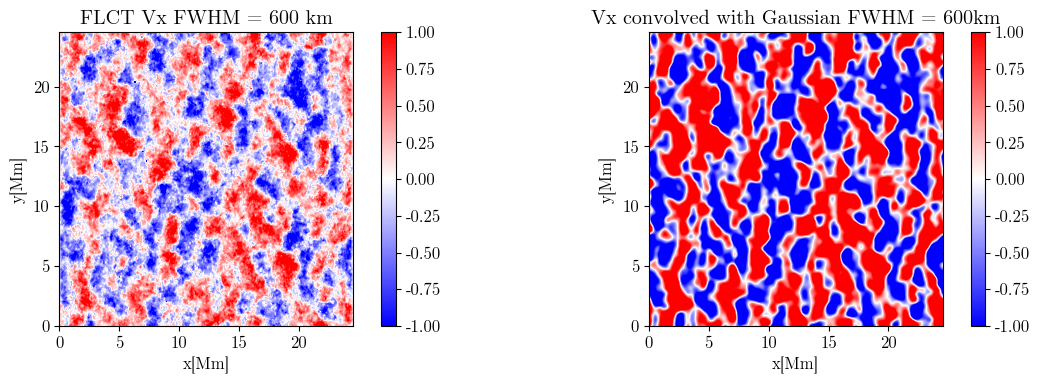

In [24]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i filtirano Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_FLCT_300[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
ax1.set_title("FLCT Vx FWHM = 600 km") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_filtered11[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -1, vmax =1)
ax2.set_title("Vx convolved with Gaussian FWHM = 600km") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("FLCT_500nm_300km", bbox_inches = 'tight', dpi = 75)

In [25]:
r_x1_300 = pearsonr(Vx_300[0].flatten(), Vx[0].flatten())
print(r_x1_300)

PearsonRResult(statistic=-0.00035072005038796984, pvalue=0.5900899203612314)


In [26]:
r_x2_300 = pearsonr(Vx_FLCT_300.flatten(), Vx_mean_sim29.flatten())
print(r_x2_300)

PearsonRResult(statistic=0.10885560465779112, pvalue=0.0)


In [27]:
r_x3_300 = pearsonr(Vx_FLCT_300.flatten(), Vx_filtered11.flatten())
print(r_x3_300)

PearsonRResult(statistic=0.11855602937067648, pvalue=0.0)


In [28]:
r_y1_300 = pearsonr(Vy_300[0].flatten(), Vy[0].flatten())
print(r_y1_300)

PearsonRResult(statistic=-0.010059671156903684, pvalue=7.309565480043097e-54)


In [29]:
r_y2_300 = pearsonr(Vy_FLCT_300.flatten(), Vy_mean_sim29.flatten())
print(r_y2_300)

PearsonRResult(statistic=0.5258266733922499, pvalue=0.0)


In [30]:
r_y3_300 = pearsonr(Vy_FLCT_300.flatten(), Vy_filtered11.flatten())
print(r_y3_300)

PearsonRResult(statistic=0.5716604440393147, pvalue=0.0)


<h2>12. 11. 2024.</h2>

<h3>FLCT velocities, result from tracking on Matthias's intensity</h3>

In [31]:
Vx_300Inte = fits.open("pyFLCT_fwhm_300_dt_30_Inte_tracked.fits")[0].data
Vy_300Inte = fits.open("pyFLCT_fwhm_300_dt_30_Inte_tracked.fits")[1].data

In [32]:
Vx_FLCT_300Inte = temporal_avg(Vx_300Inte, 0, 29)
Vy_FLCT_300Inte = temporal_avg(Vy_300Inte, 0, 29)

<h4>Velocities, LW at 500nm vs. Intensity from sim as tracked parameter </h4>

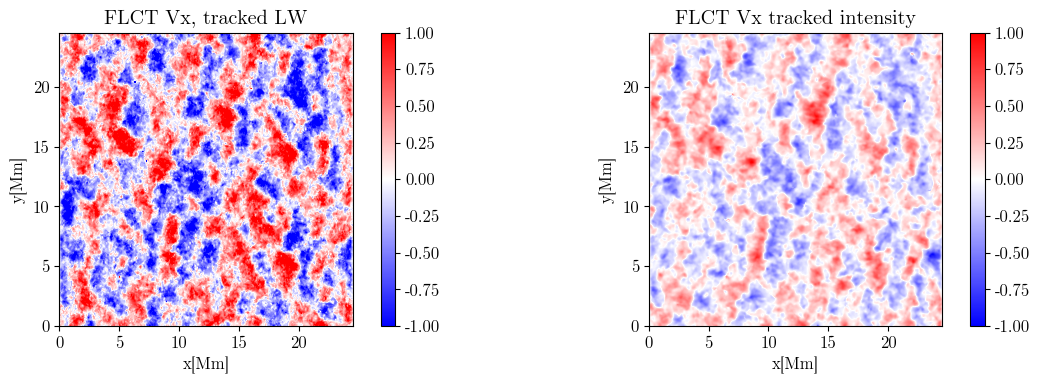

In [33]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i filtirano Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_FLCT_300[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
ax1.set_title("FLCT Vx, tracked LW") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_FLCT_300Inte[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -1, vmax =1)
ax2.set_title("FLCT Vx tracked intensity") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("FLCT_N500nm_300km", bbox_inches = 'tight', dpi = 75)

In [34]:
r = pearsonr(Vx_FLCT_300.flatten(), Vx_FLCT_300Inte.flatten())
print(r)

PearsonRResult(statistic=0.10247762509417815, pvalue=0.0)


In [35]:
Vx_600Inte = fits.open("pyFLCT_fwhm_600_dt_30_Inte_tracked.fits")[0].data
Vy_600Inte = fits.open("pyFLCT_fwhm_600_dt_30_Inte_tracked.fits")[1].data

In [36]:
Vx_FLCT_600Inte = temporal_avg(Vx_600Inte, 0, 29)
Vy_FLCT_600Inte = temporal_avg(Vy_600Inte, 0, 29)

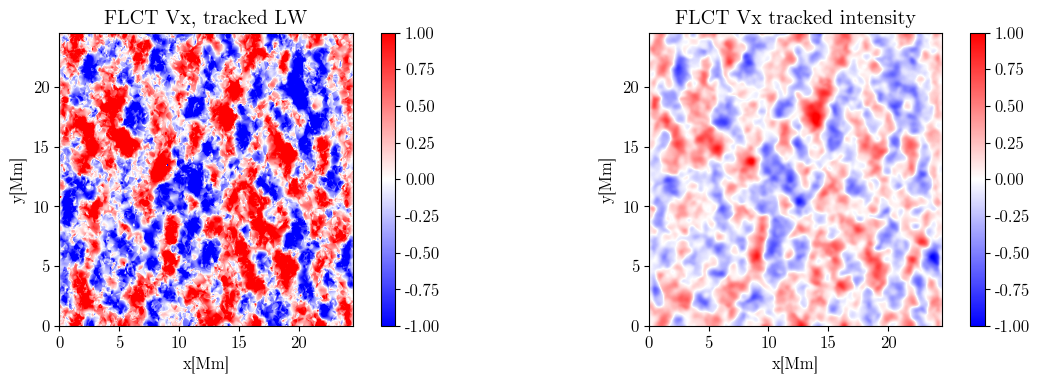

In [37]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i filtirano Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_FLCT_600[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
ax1.set_title("FLCT Vx, tracked LW") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_FLCT_600Inte[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -1, vmax =1)
ax2.set_title("FLCT Vx tracked intensity") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("FLCT_N500nm_600km", bbox_inches = 'tight', dpi = 75)

In [38]:
r = pearsonr(Vx_FLCT_600.flatten(), Vx_FLCT_600Inte.flatten())
print(r)

PearsonRResult(statistic=0.24427162096629162, pvalue=0.0)


In [39]:
r = pearsonr(Vy_FLCT_600.flatten(), Vy_FLCT_600Inte.flatten())
print(r)

PearsonRResult(statistic=0.4590163065248625, pvalue=0.0)


<h3>FLCT velocities, every third snapshot taken (150th step) vs. LW intensity at 500nm</h3>

In [40]:
Vx_300Inte3 = fits.open("pyFLCT_fwhm_300_dt_30_Inte%3_tracked.fits")[0].data
Vy_300Inte3 = fits.open("pyFLCT_fwhm_300_dt_30_Inte%3_tracked.fits")[1].data

In [41]:
Vx_FLCT_300Inte3 = temporal_avg(Vx_300Inte3, 0, 29)
Vy_FLCT_300Inte3 = temporal_avg(Vy_300Inte3, 0, 29)

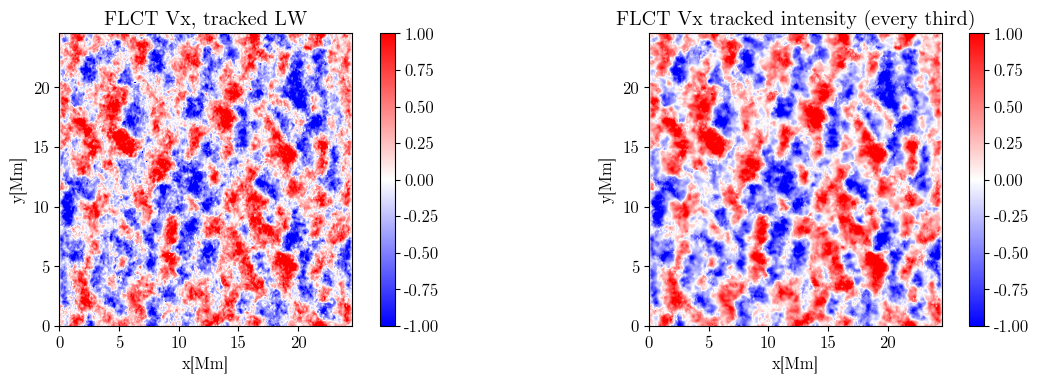

In [42]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i filtirano Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_FLCT_300[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
ax1.set_title("FLCT Vx, tracked LW") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_FLCT_300Inte3[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -1, vmax =1)
ax2.set_title("FLCT Vx tracked intensity (every third)") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("FLCT_N500nm_300km3", bbox_inches = 'tight', dpi = 75)

In [43]:
r = pearsonr(Vx_FLCT_300.flatten(), Vx_FLCT_300Inte3.flatten())
print(r)

PearsonRResult(statistic=0.12068451594144261, pvalue=0.0)


Text(0, 0.5, "Tracking on Mattias's intensity")

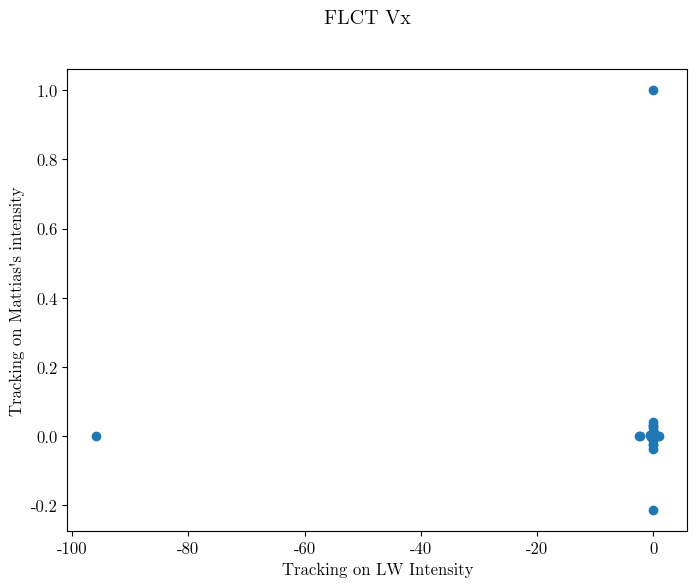

In [44]:
fig = plt.figure(figsize = (8,6))
plt.suptitle("FLCT Vx")
plt.scatter(Vx_FLCT_300.flatten()/np.max(Vx_FLCT_300.flatten()), Vx_FLCT_300Inte3.flatten()/np.max(Vx_FLCT_300Inte3.flatten()))
plt.xlabel("Tracking on LW Intensity")
plt.ylabel("Tracking on Mattias's intensity")
#plt.show()
#plt.savefig("TempInte.png", dpi = 300)

<h2>Tracking minimal intensity</h2>

In [45]:
# Second method
cube = fits.open("150_lwsynth_100.0.fits")[0].data
cube_info = fits.open("150_lwsynth_100.0.fits")[1].data

In [46]:
print(cube_info)

[ 100.      200.      300.      400.      500.      600.      700.
  800.      900.     1000.     1100.     1200.     1300.     1400.
 1500.     1600.     1700.     1800.     1900.     2000.     2100.
  525.      525.0005  525.001   525.0015  525.002   525.0025  525.003
  525.0035  525.004   525.0045  525.005   525.0055  525.006   525.0065
  525.007   525.0075  525.008   525.0085  525.009   525.0095  525.01
  525.0105  525.011   525.0115  525.012   525.0125  525.013   525.0135
  525.014   525.0145  525.015   525.0155  525.016   525.0165  525.017
  525.0175  525.018   525.0185  525.019   525.0195  525.02    525.0205
  525.021   525.0215  525.022   525.0225  525.023   525.0235  525.024
  525.0245  525.025   525.0255  525.026   525.0265  525.027   525.0275
  525.028   525.0285  525.029   525.0295  525.03    525.0305  525.031
  525.0315  525.032   525.0325  525.033   525.0335  525.034   525.0345
  525.035   525.0355  525.036   525.0365  525.037   525.0375  525.038
  525.0385  525.039   525

In [47]:
print(cube)

[[[[2.00330531e-20 1.66607785e-11 9.09928255e-09 ... 3.15085347e-08
    3.15147918e-08 3.15204985e-08]]

  [[5.89798282e-20 1.82748981e-11 1.01068836e-08 ... 3.30528595e-08
    3.30591707e-08 3.30649245e-08]]

  [[7.66892959e-19 2.20883161e-11 1.10438851e-08 ... 3.49685497e-08
    3.49750988e-08 3.49810640e-08]]

  ...

  [[6.59036946e-24 1.55273376e-11 6.93795118e-09 ... 2.75132570e-08
    2.75182769e-08 2.75228677e-08]]

  [[1.54694881e-21 1.50666066e-11 7.60336916e-09 ... 2.86222250e-08
    2.86277663e-08 2.86328266e-08]]

  [[1.93037500e-20 1.57268875e-11 8.67171780e-09 ... 3.02439495e-08
    3.02499376e-08 3.02554013e-08]]]


 [[[2.51401196e-20 1.44760044e-11 7.15352536e-09 ... 2.83431654e-08
    2.83487305e-08 2.83538037e-08]]

  [[7.49522347e-20 1.50672980e-11 7.99790153e-09 ... 2.95787352e-08
    2.95845711e-08 2.95898879e-08]]

  [[8.42237883e-19 1.66571446e-11 8.88934904e-09 ... 3.10215394e-08
    3.10274675e-08 3.10328687e-08]]

  ...

  [[2.62557066e-22 1.64620649e-11 6.559

In [48]:
image = cube[:,:,0,21:]

In [49]:
np.shape(image)

(1536, 1536, 81)

In [50]:
image = np.min(image, axis = 2)
print(image)

[[4.63573078e-09 4.56579369e-09 4.52392326e-09 ... 5.45550034e-09
  5.27668038e-09 4.90013047e-09]
 [4.76199321e-09 4.76634135e-09 4.68952742e-09 ... 5.84610704e-09
  5.52589443e-09 5.05444929e-09]
 [4.94491869e-09 4.91915760e-09 4.76952873e-09 ... 6.18110809e-09
  5.75056418e-09 5.23416052e-09]
 ...
 [4.43143853e-09 4.16315970e-09 4.08998981e-09 ... 4.88952712e-09
  4.85439480e-09 4.72176624e-09]
 [4.43549264e-09 4.23633145e-09 4.22726628e-09 ... 5.01167771e-09
  4.98018175e-09 4.73632105e-09]
 [4.54140567e-09 4.37532490e-09 4.36506951e-09 ... 5.19597418e-09
  5.11815166e-09 4.76810230e-09]]


In [51]:
np.shape(image)

(1536, 1536)

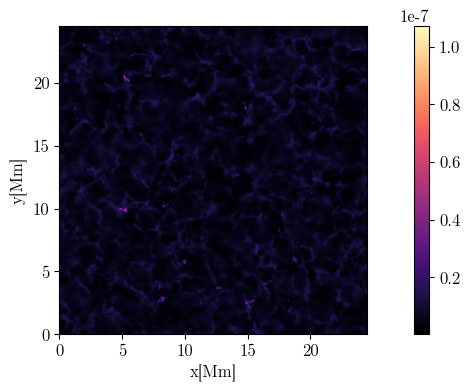

In [52]:
fig = plt.figure(figsize = (12,4))
plt.imshow(image, origin = "lower", cmap='magma', extent = (0, 24.536, 0, 24.536))
#plt.set_title("FLCT Vx cadence 30s") 
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.colorbar()

In [53]:
image_nas = cube[:,:,0,67]
np.shape(image_nas)

(1536, 1536)

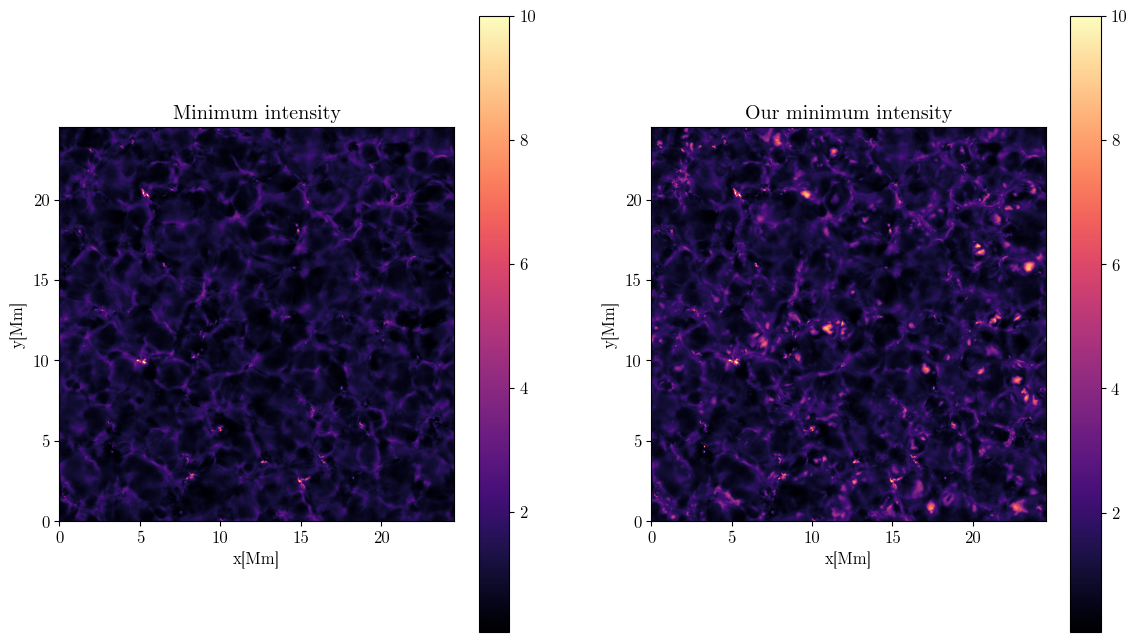

In [54]:
# Poredjenje
fig = plt.figure(figsize = (14,8))
#fig.suptitle("FLCT Vx i Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(image[:, :]/np.mean(image), origin='lower',cmap='magma', extent = (0, 24.536, 0, 24.536), vmax = 10)
ax1.set_title("Minimum intensity") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(image_nas[:, :]/np.mean(image), origin='lower', cmap='magma', extent = (0, 24.536, 0, 24.536), vmax = 10)
ax2.set_title("Our minimum intensity") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
plt.savefig("Try.png", dpi = 300)

<h2>FLCT velocities: FWHM = 300 km; cadence 10 s vs 30 s</h2>

In [55]:
Vx_300Inte3 = fits.open("pyFLCT_fwhm_300_dt_30_Inte%3_tracked.fits")[0].data
Vy_300Inte3 = fits.open("pyFLCT_fwhm_300_dt_30_Inte%3_tracked.fits")[1].data

In [56]:
Vx_300Inte3.shape

(120, 1536, 1536)

In [57]:
Vx_300Inte = fits.open("pyFLCT_fwhm_300_dt_30_Inte_tracked.fits")[0].data
Vy_300Inte = fits.open("pyFLCT_fwhm_300_dt_30_Inte_tracked.fits")[1].data

In [58]:
r_xraw = pearsonr(Vx_300Inte3[0].flatten(), Vx_300Inte[0].flatten())
print(r_xraw)

PearsonRResult(statistic=0.7097365880015932, pvalue=0.0)


In [59]:
r_yraw = pearsonr(Vy_300Inte3[0].flatten(), Vy_300Inte[0].flatten())
print(r_yraw)

PearsonRResult(statistic=0.7276600008380618, pvalue=0.0)


In [60]:
Vx_FLCT_300Inte3 = temporal_avg(Vx_300Inte3, 0, 90)
Vy_FLCT_300Inte3 = temporal_avg(Vy_300Inte3, 0, 90)

In [61]:
Vx_FLCT_300Inte = temporal_avg(Vx_300Inte, 0, 90)
Vy_FLCT_300Inte = temporal_avg(Vy_300Inte, 0, 90)

In [62]:
r_xtime = pearsonr(Vx_FLCT_300Inte3.flatten(), Vx_FLCT_300Inte.flatten())
print(r_xtime)

PearsonRResult(statistic=0.7323254933730154, pvalue=0.0)


In [63]:
r_ytime = pearsonr(Vy_FLCT_300Inte3.flatten(), Vy_FLCT_300Inte.flatten())
print(r_ytime)

PearsonRResult(statistic=0.7657032469219093, pvalue=0.0)


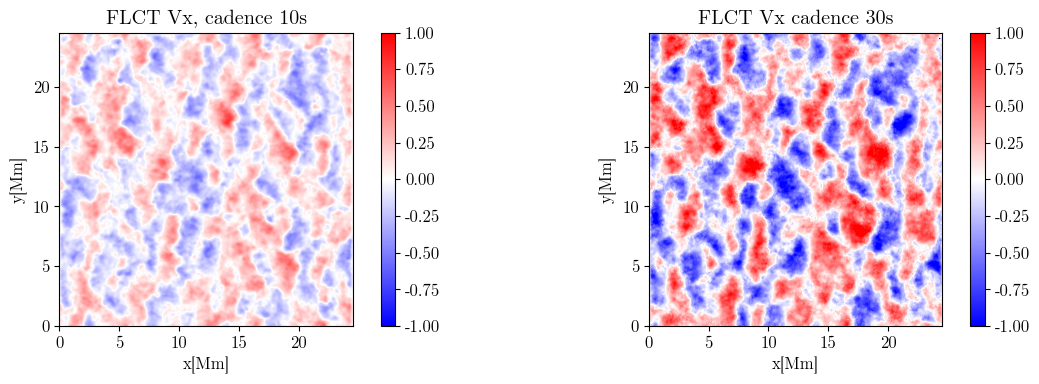

In [64]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i filtirano Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_FLCT_300Inte[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
ax1.set_title("FLCT Vx, cadence 10s") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_FLCT_300Inte3[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -1, vmax =1)
ax2.set_title("FLCT Vx cadence 30s") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("FLCT_Vx_cadence10vs30.png", bbox_inches = 'tight', dpi = 75)

<h2>Simulation velocities, every step vs. every third step</h2>

In [65]:
Vx = fits.open("Velocities_TAU_1_0.fits")[1].data # Vy from Velocities.fits as originally thought
Vy = fits.open("Velocities_TAU_1_0.fits")[0].data # Vx from Velocities.fits as originally thought
Vx = Vx.transpose(0, 2, 1)
Vy = Vy.transpose(0, 2, 1)

In [66]:
Vx_third = fits.open("Velocities_TAU_1_0.fits")[1].data # Vy from Velocities.fits as originally thought
Vy_third = fits.open("Velocities_TAU_1_0.fits")[0].data # Vx from Velocities.fits as originally thought
Vx_third = Vx_third[::3]
Vy_third = Vy_third[::3]
Vx_third = Vx_third.transpose(0, 2, 1)
Vy_third = Vy_third.transpose(0, 2, 1)

In [67]:
Vx_mean_sim90 = temporal_avg(Vx, 0, 60)
Vx_mean_sim90 = Vx_mean_sim90/1E5

Vy_mean_sim90 = temporal_avg(Vy, 0, 60)
Vy_mean_sim90 = Vy_mean_sim90/1E5

Vx_mean3_sim90 = temporal_avg(Vx_third, 0, 60)
Vx_mean3_sim90 = Vx_mean3_sim90/1E5

Vy_mean3_sim90 = temporal_avg(Vy_third, 0, 60)
Vy_mean3_sim90 = Vy_mean3_sim90/1E5

In [68]:
Rx_30 = pearsonr(Vx_mean_sim90.flatten(), Vx_mean3_sim90.flatten())
print(Rx_30)

PearsonRResult(statistic=0.7340845707332262, pvalue=0.0)


In [69]:
Ry_30 = pearsonr(Vy_mean_sim90.flatten(), Vy_mean3_sim90.flatten())
print(Ry_30)

PearsonRResult(statistic=0.7358798762740864, pvalue=0.0)


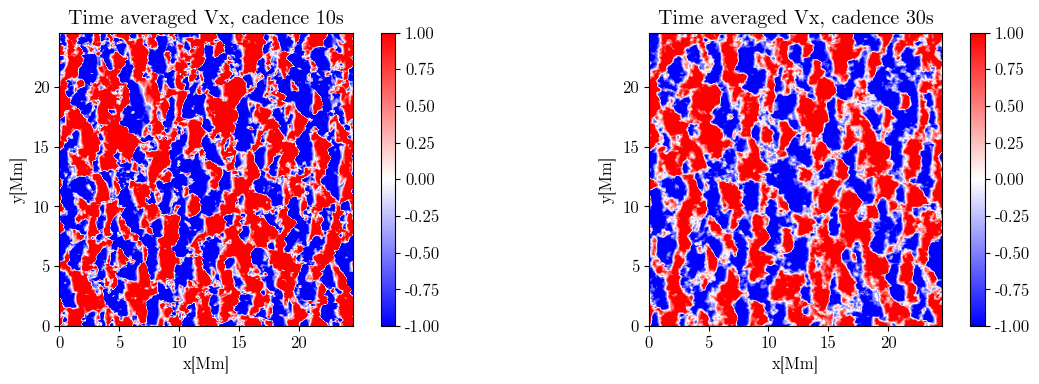

In [70]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i filtirano Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_mean_sim90[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
ax1.set_title("Time averaged Vx, cadence 10s") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_mean3_sim90[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -1, vmax =1)
ax2.set_title("Time averaged Vx, cadence 30s") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Simulation_cadence.png", bbox_inches = 'tight', dpi = 75)

In [71]:
# Mali python kod koji ovo reprodukuje!!!!!!!!!!!!!!

<h2>2. 12. 2024.</h2>

<h3>40 s cadence</h3>

In [72]:
Vx_fourth = fits.open("Velocities_TAU_1_0.fits")[1].data # Vy from Velocities.fits as originally thought
Vy_fourth = fits.open("Velocities_TAU_1_0.fits")[0].data # Vx from Velocities.fits as originally thought
Vx_fourth = Vx_fourth[::4]
Vy_fourth = Vy_fourth[::4]
Vx_fourth = Vx_fourth.transpose(0, 2, 1)
Vy_fourth = Vy_fourth.transpose(0, 2, 1)

In [73]:
np.shape(Vx_fourth)

(91, 1536, 1536)

In [74]:
Vx_mean4_sim90 = temporal_avg(Vx_fourth, 0, 60)
Vx_mean4_sim90 = Vx_mean4_sim90/1E5

Vy_mean4_sim90 = temporal_avg(Vy_fourth, 0, 60)
Vy_mean4_sim90 = Vy_mean4_sim90/1E5

In [75]:
Rx_40 = pearsonr(Vx_mean_sim90.flatten(), Vx_mean4_sim90.flatten())
print(Rx_40)

PearsonRResult(statistic=0.6589635485958045, pvalue=0.0)


In [76]:
Ry_40 = pearsonr(Vy_mean_sim90.flatten(), Vy_mean4_sim90.flatten())
print(Ry_40)

PearsonRResult(statistic=0.6593449276036419, pvalue=0.0)


<h3>50 s cadence</h3>

In [77]:
Vx_fifth = fits.open("Velocities_TAU_1_0.fits")[1].data # Vy from Velocities.fits as originally thought
Vy_fifth = fits.open("Velocities_TAU_1_0.fits")[0].data # Vx from Velocities.fits as originally thought
Vx_fifth = Vx_fifth[::5]
Vy_fifth = Vy_fifth[::5]
Vx_fifth = Vx_fifth.transpose(0, 2, 1)
Vy_fifth = Vy_fifth.transpose(0, 2, 1)

In [78]:
np.shape(Vx_fifth)

(73, 1536, 1536)

In [79]:
Vx_mean5_sim90 = temporal_avg(Vx_fifth, 0, 60)
Vx_mean5_sim90 = Vx_mean5_sim90/1E5

Vy_mean5_sim90 = temporal_avg(Vy_fifth, 0, 60)
Vy_mean5_sim90 = Vy_mean5_sim90/1E5

In [80]:
Rx_50 = pearsonr(Vx_mean_sim90.flatten(), Vx_mean5_sim90.flatten())
print(Rx_50)

PearsonRResult(statistic=0.5973901878942697, pvalue=0.0)


In [81]:
Ry_50 = pearsonr(Vy_mean_sim90.flatten(), Vy_mean5_sim90.flatten())
print(Ry_50)

PearsonRResult(statistic=0.6086900795855972, pvalue=0.0)


<h3>60 s cadence</h3>

In [82]:
Vx_sixth = fits.open("Velocities_TAU_1_0.fits")[1].data # Vy from Velocities.fits as originally thought
Vy_sixth = fits.open("Velocities_TAU_1_0.fits")[0].data # Vx from Velocities.fits as originally thought
Vx_sixth = Vx_sixth[::6]
Vy_sixth = Vy_sixth[::6]
Vx_sixth = Vx_sixth.transpose(0, 2, 1)
Vy_sixth = Vy_sixth.transpose(0, 2, 1)

In [83]:
np.shape(Vx_sixth)

(61, 1536, 1536)

In [84]:
Vx_mean6_sim90 = temporal_avg(Vx_sixth, 0, 60)
Vx_mean6_sim90 = Vx_mean6_sim90/1E5

Vy_mean6_sim90 = temporal_avg(Vy_sixth, 0, 60)
Vy_mean6_sim90 = Vy_mean6_sim90/1E5

In [85]:
Rx_60 = pearsonr(Vx_mean_sim90.flatten(), Vx_mean6_sim90.flatten())
print(Rx_60)

PearsonRResult(statistic=0.5497768814266647, pvalue=0.0)


In [86]:
Ry_60 = pearsonr(Vy_mean_sim90.flatten(), Vy_mean6_sim90.flatten())
print(Ry_60)

PearsonRResult(statistic=0.5618881653287631, pvalue=0.0)


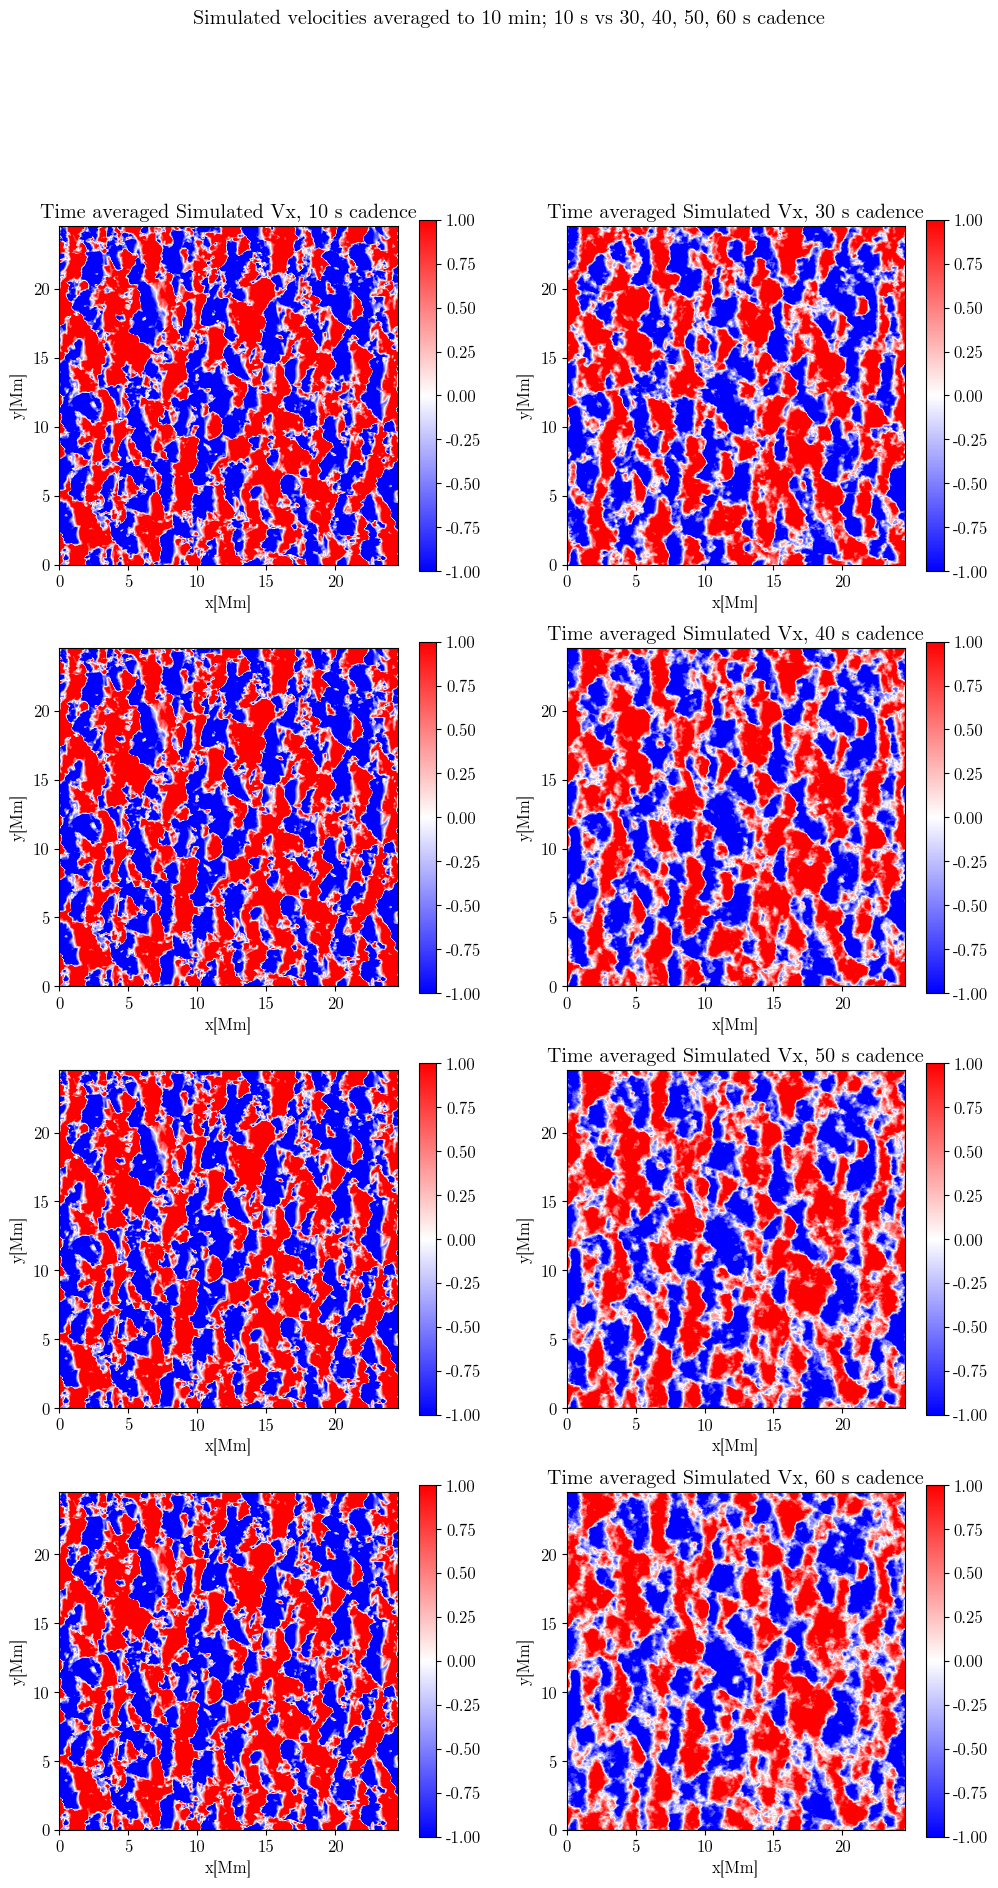

In [87]:
plt.figure(figsize=[12, 21])       
plt.suptitle("Simulated velocities averaged to 10 min; 10 s vs 30, 40, 50, 60 s cadence")# atmos[0] tau

plt.subplot(421)                                      # atmos[1] temp
plt.title("Time averaged Simulated Vx, 10 s cadence")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_mean_sim90[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(422)                                      # atmos[1] temp
plt.title("Time averaged Simulated Vx, 30 s cadence")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_mean3_sim90[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(423)                                      # atmos[1] temp
#plt.title("Time averaged Simulated Vx, 10 s cadence")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_mean_sim90[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(424)
plt.title("Time averaged Simulated Vx, 40 s cadence")
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_mean4_sim90[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(425)
#plt.title("Time averaged Simulated Vx, 10 s cadence")
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_mean_sim90[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(426)
plt.title("Time averaged Simulated Vx, 50 s cadence")
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_mean5_sim90[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(427)                                      # atmos[1] temp
#plt.title("Time averaged Simulated Vx, 10 s cadence")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_mean_sim90[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(428)                                      # atmos[1] temp
plt.title("Time averaged Simulated Vx, 60 s cadence")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_mean6_sim90[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

fig.tight_layout()
plt.savefig("Different_cadences.png", dpi = 300)

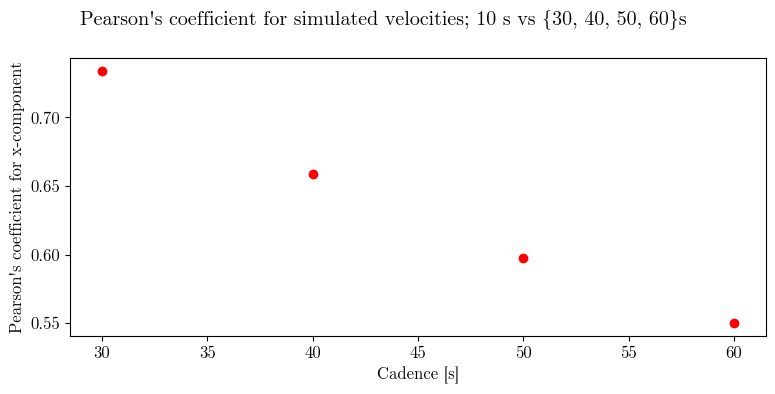

In [88]:
plt.figure(figsize = (8,4))
niz = [Rx_30[0], Rx_40[0], Rx_50[0], Rx_60[0]]
niz2 = [30, 40, 50, 60]
plt.suptitle("Pearson's coefficient for simulated velocities; 10 s vs {30, 40, 50, 60}s")
plt.scatter(niz2, niz, color = "red")
plt.ylabel("Pearson's coefficient for x-component")
plt.xlabel("Cadence [s]")
#m1, b1, *_ = linregress(Vx_FLCT_1200.flatten(), Vx_FLCT_T.flatten())
#plt.axline(xy1=(0, b1), slope=m1, label=f'$y = {m1:.3f}x {b1:+.3f}$')
#plt.legend()
plt.tight_layout()
plt.savefig("X_different_cadences.png", bbox_inches = 'tight', dpi = 300)

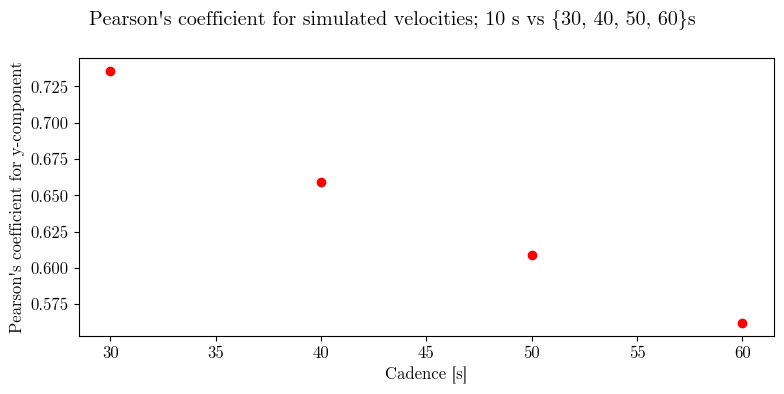

In [89]:
plt.figure(figsize = (8,4))
niz = [Ry_30[0], Ry_40[0], Ry_50[0], Ry_60[0]]
niz2 = [30, 40, 50, 60]
plt.suptitle("Pearson's coefficient for simulated velocities; 10 s vs {30, 40, 50, 60}s")
plt.scatter(niz2, niz, color = "red")
plt.ylabel("Pearson's coefficient for y-component")
plt.xlabel("Cadence [s]")
#m1, b1, *_ = linregress(Vx_FLCT_1200.flatten(), Vx_FLCT_T.flatten())
#plt.axline(xy1=(0, b1), slope=m1, label=f'$y = {m1:.3f}x {b1:+.3f}$')
#plt.legend()
plt.tight_layout()
plt.savefig("Y_different_cadences.png", bbox_inches = 'tight', dpi = 300)

<h2>FLCT Velocities, cadence 30 s, FWHM = {600, 1200} km</h2>

In [90]:
Vx_600Inte3 = fits.open("pyFLCT_fwhm_600_dt_30_Inte%3_tracked.fits")[0].data
Vy_600Inte3 = fits.open("pyFLCT_fwhm_600_dt_30_Inte%3_tracked.fits")[1].data

In [91]:
np.shape(Vx_600Inte3)

(120, 1536, 1536)

In [92]:
Vx_1200Inte3 = fits.open("pyFLCT_fwhm_1200_dt_30_Inte%3_tracked.fits")[0].data
Vy_1200Inte3 = fits.open("pyFLCT_fwhm_1200_dt_30_Inte%3_tracked.fits")[1].data

In [93]:
Vx_600Inte = fits.open("pyFLCT_fwhm_600_dt_30_Inte_tracked.fits")[0].data
Vy_600Inte = fits.open("pyFLCT_fwhm_600_dt_30_Inte_tracked.fits")[1].data

In [94]:
Vx_1200Inte = fits.open("pyFLCT_fwhm_1200_dt_30_Inte_tracked.fits")[0].data
Vy_1200Inte = fits.open("pyFLCT_fwhm_1200_dt_30_Inte_tracked.fits")[1].data

In [95]:
r_xraw600 = pearsonr(Vx_600Inte3[0].flatten(), Vx_600Inte[0].flatten())
print(r_xraw600)

PearsonRResult(statistic=0.9396278595348088, pvalue=0.0)


In [96]:
r_yraw600 = pearsonr(Vy_600Inte3[0].flatten(), Vy_600Inte[0].flatten())
print(r_yraw600)

PearsonRResult(statistic=0.9426312220343906, pvalue=0.0)


In [97]:
Vx_FLCT_600Inte3 = temporal_avg(Vx_600Inte3, 0, 90)
Vy_FLCT_600Inte3 = temporal_avg(Vy_600Inte3, 0, 90)

In [98]:
Vx_FLCT_600Inte = temporal_avg(Vx_600Inte, 0, 90)
Vy_FLCT_600Inte = temporal_avg(Vy_600Inte, 0, 90)

In [99]:
r_xtime600 = pearsonr(Vx_FLCT_600Inte3.flatten(), Vx_FLCT_600Inte.flatten())
print(r_xtime600)

PearsonRResult(statistic=0.7925758526493951, pvalue=0.0)


In [100]:
r_ytime600 = pearsonr(Vy_FLCT_600Inte3.flatten(), Vy_FLCT_600Inte.flatten())
print(r_ytime600)

PearsonRResult(statistic=0.7990541206259694, pvalue=0.0)


In [101]:
r_xraw1200 = pearsonr(Vx_1200Inte3[0].flatten(), Vx_1200Inte[0].flatten())
print(r_xraw1200)

PearsonRResult(statistic=0.9705374679802521, pvalue=0.0)


In [102]:
r_yraw1200 = pearsonr(Vy_1200Inte3[0].flatten(), Vy_1200Inte[0].flatten())
print(r_yraw1200)

PearsonRResult(statistic=0.9721946095511897, pvalue=0.0)


In [103]:
Vx_FLCT_1200Inte3 = temporal_avg(Vx_1200Inte3, 0, 90)
Vy_FLCT_1200Inte3 = temporal_avg(Vy_1200Inte3, 0, 90)

In [104]:
Vx_FLCT_1200Inte = temporal_avg(Vx_1200Inte, 0, 90)
Vy_FLCT_1200Inte = temporal_avg(Vy_1200Inte, 0, 90)

In [105]:
r_ytime1200 = pearsonr(Vy_FLCT_1200Inte3.flatten(), Vy_FLCT_1200Inte.flatten())
print(r_ytime1200)

PearsonRResult(statistic=0.8269398909073761, pvalue=0.0)


In [106]:
r_xtime1200 = pearsonr(Vx_FLCT_1200Inte3.flatten(), Vx_FLCT_1200Inte.flatten())
print(r_xtime1200)

PearsonRResult(statistic=0.8236296094713095, pvalue=0.0)


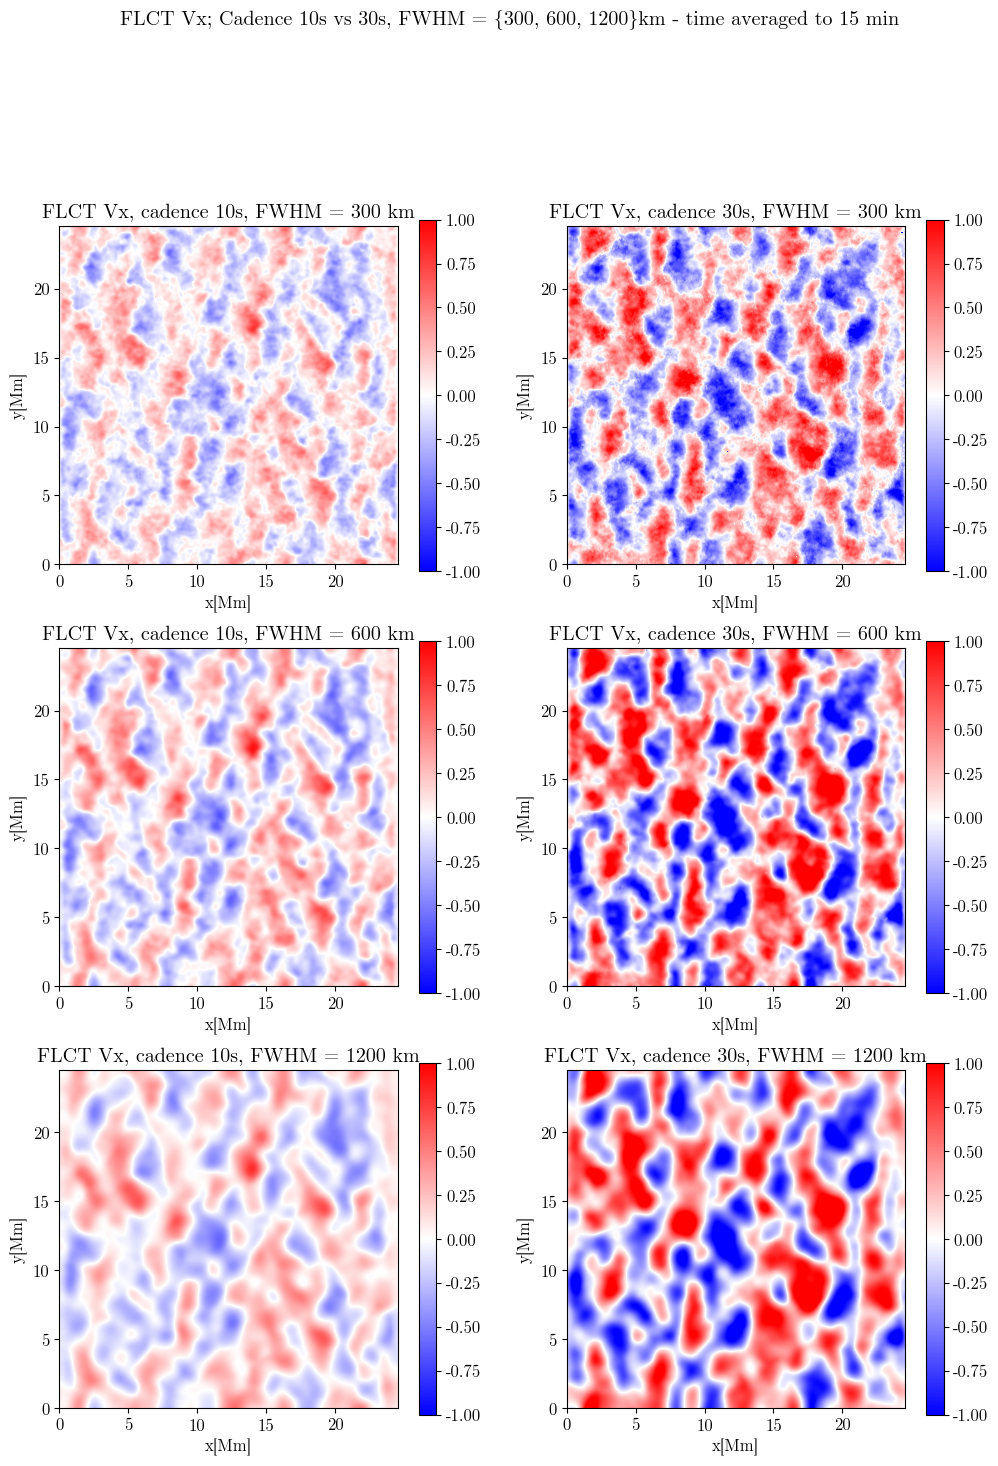

In [107]:
plt.figure(figsize=[12, 21])       
plt.suptitle("FLCT Vx; Cadence 10s vs 30s, FWHM = {300, 600, 1200}km - time averaged to 15 min")# atmos[0] tau

plt.subplot(421)                                      # atmos[1] temp
plt.title("FLCT Vx, cadence 10s, FWHM = 300 km")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_FLCT_300Inte[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(422)                                      # atmos[1] temp
plt.title("FLCT Vx, cadence 30s, FWHM = 300 km")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_FLCT_300Inte3[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(423)                                      # atmos[1] temp
plt.title("FLCT Vx, cadence 10s, FWHM = 600 km")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_FLCT_600Inte[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(424)
plt.title("FLCT Vx, cadence 30s, FWHM = 600 km")
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_FLCT_600Inte3[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(425)
plt.title("FLCT Vx, cadence 10s, FWHM = 1200 km")
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_FLCT_1200Inte[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(426)
plt.title("FLCT Vx, cadence 30s, FWHM = 1200 km")
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_FLCT_1200Inte3[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()


fig.tight_layout()
plt.savefig("10vs30_seconds_FWHM.png", dpi = 100)

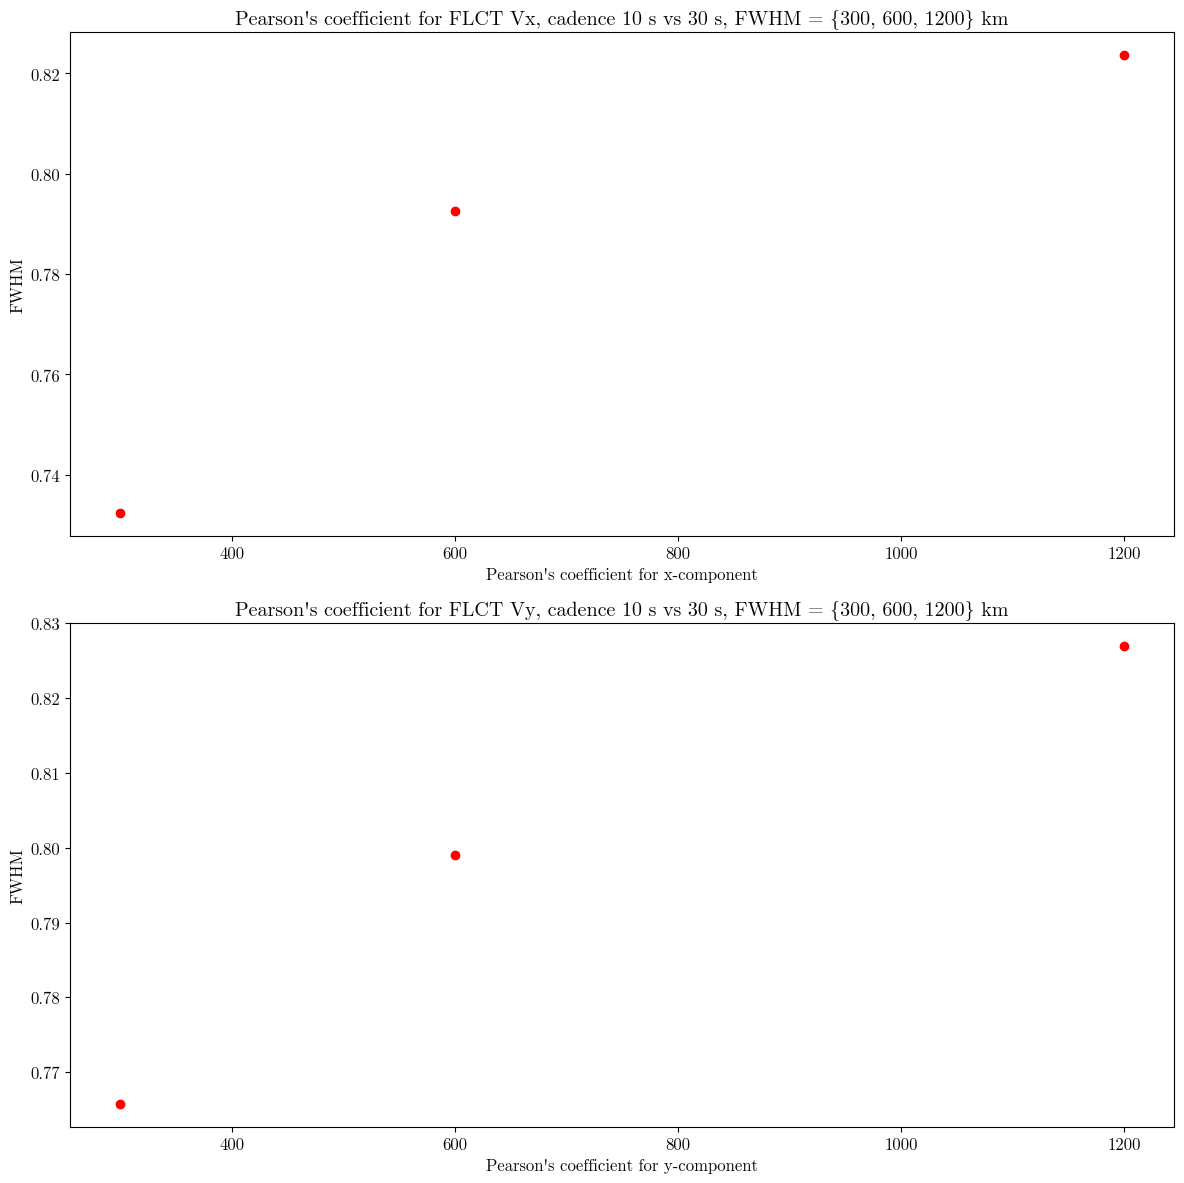

In [115]:
fig = plt.figure(figsize = (12,12))
#fig.suptitle("FLCT Vx i filtirano Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(211)
niz = [r_xtime[0], r_xtime600[0], r_xtime1200[0]]
niz2 = [300, 600, 1200]
ax1.set_title("Pearson's coefficient for FLCT Vx, cadence 10 s vs 30 s, FWHM = {300, 600, 1200} km")
ax1.scatter(niz2, niz, color = "red")
ax1.set(xlabel = "Pearson's coefficient for x-component", ylabel = "FWHM")
#m1, b1, *_ = linregress(Vx_FLCT_1200.flatten(), Vx_FLCT_T.flatten())
#plt.axline(xy1=(0, b1), slope=m1, label=f'$y = {m1:.3f}x {b1:+.3f}$')
#plt.legend()


ax2 = fig.add_subplot(212)
niz = [r_ytime[0], r_ytime600[0], r_ytime1200[0]]
niz2 = [300, 600, 1200]
ax2.set_title("Pearson's coefficient for FLCT Vy, cadence 10 s vs 30 s, FWHM = {300, 600, 1200} km")
ax2.scatter(niz2, niz, color = "red")
ax2.set(xlabel = "Pearson's coefficient for y-component", ylabel = "FWHM")
fig.tight_layout()
plt.savefig("FLCT_10vs30_ALL_FWHM.png", bbox_inches = 'tight', dpi = 75)